 **Implement the Intensity Transformation**

51
0
100
100
100
256


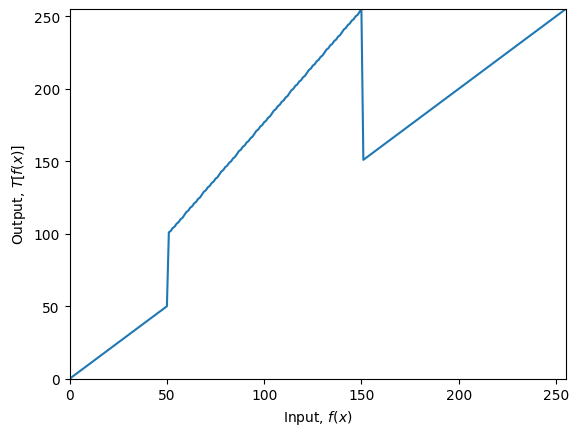

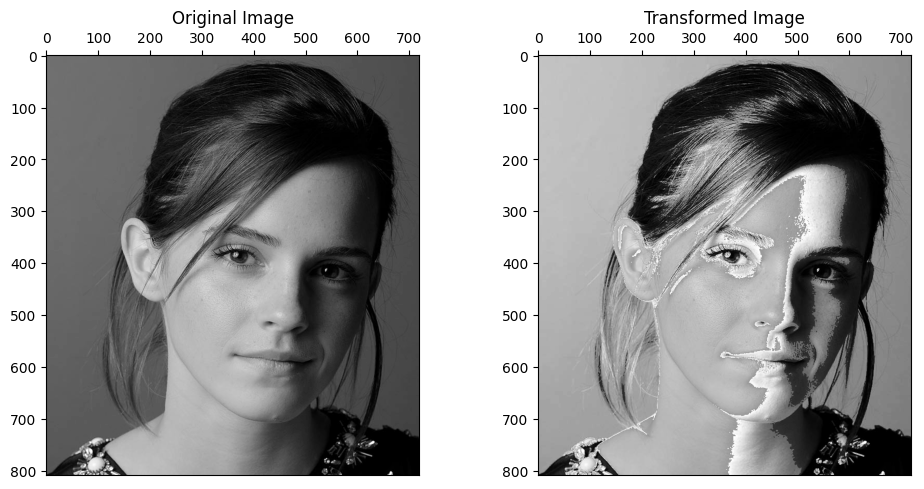

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50,50),(50, 100), (150, 255), (150,150)])
t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
print(len(t1))
t2 = np.linspace(c[0,1], c[1,1], c[1,0] - c[0,0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[1,1] + 1, c[2,1], c[2,0] - c[1,0]).astype('uint8') 
print(len(t3))
t4 = np.linspace(c[2,1], c[3,1], c[3,0] - c[2,0]).astype('uint8') 
print(len(t3))
t5 = np.linspace(c[3,1] + 1, 255, 255 - c[3,0]).astype('uint8') 
print(len(t3))
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
transform = np.concatenate((transform, t5), axis=0).astype('uint8')
print(len(transform))

plt.plot(transform)
plt.xlabel('Input, $f(x)$')
plt.ylabel('Output, $T[f(x)]$')
plt.xlim(0,255)
plt.ylim(0,255)
# plt.grid(color='black', linestyle='-', linewidth=1)
plt.savefig('transform.png')
plt.show()

img_orig = cv.imread(r"C:\Users\samko\Downloads\a1images\emma.jpg", cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig, transform)

plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')

plt.title("Original Image")
plt.imshow(img_orig, cmap='gray')


plt.subplot(1, 2, 2)
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')

plt.title("Transformed Image")
plt.imshow(image_transformed, cmap='gray')


plt.tight_layout()
plt.savefig('EMMA.png')
plt.show()

**Intensity Transformation of a Brain Proton Density Slice**

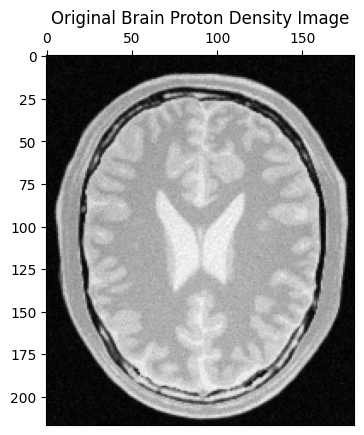

(217, 181)


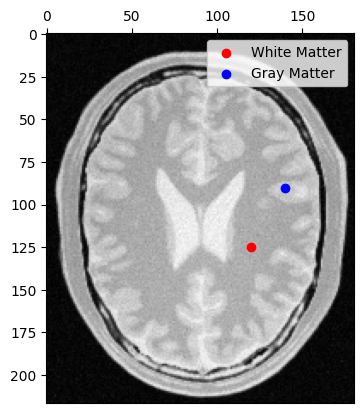

White Matter Intensity: 164
Gray Matter Intensity: 197


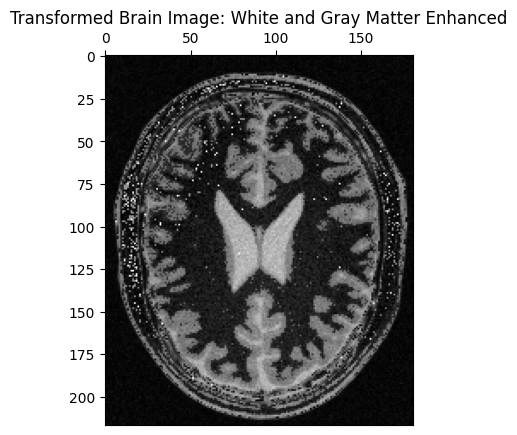

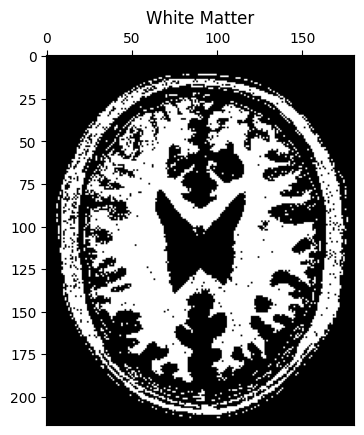

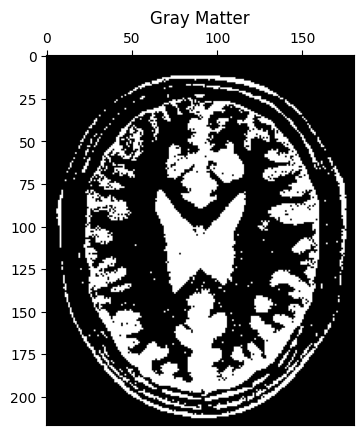

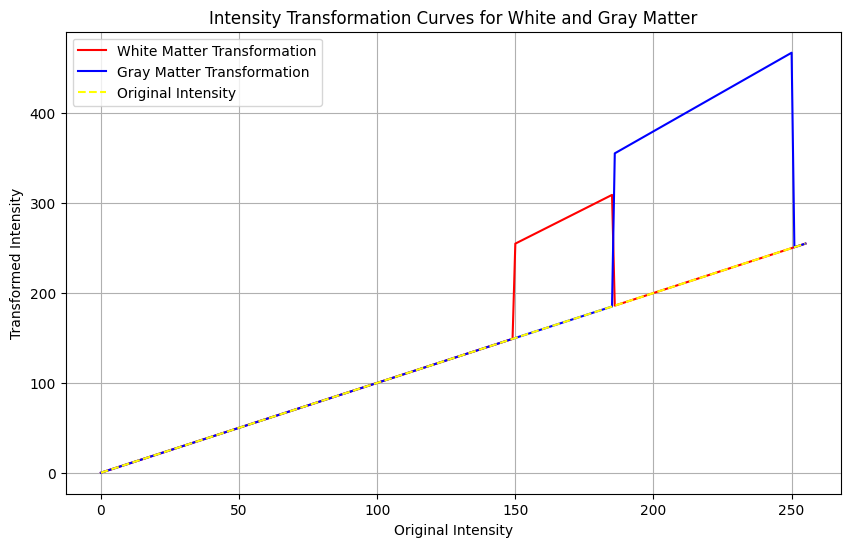

In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the brain proton density image in grayscale
brain_image = cv2.imread(r"C:\Users\samko\Downloads\a1images\brain_proton_density_slice.png", cv2.IMREAD_GRAYSCALE)

# Display the original brain image
plt.imshow(brain_image, cmap='gray')
plt.title("Original Brain Proton Density Image")
plt.savefig("Original Brain Proton Density Image")
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')
plt.show()

# Output the shape of the image
print(brain_image.shape)

# Coordinates for sampling intensities
white_matter_coords = (120, 125)
gray_matter_coords = (140, 90)

# Show locations of white and gray matter in the image
plt.imshow(brain_image, cmap="gray")
plt.scatter(white_matter_coords[0], white_matter_coords[1], color='red', label='White Matter')
plt.scatter(gray_matter_coords[0], gray_matter_coords[1], color='blue', label='Gray Matter')
plt.legend()
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')
plt.show()

# Retrieve pixel intensities at specified points
white_matter_intensity = brain_image[white_matter_coords]
gray_matter_intensity = brain_image[gray_matter_coords]

# Output pixel intensities for white and gray matter
print(f"White Matter Intensity: {white_matter_intensity}")
print(f"Gray Matter Intensity: {gray_matter_intensity}")

# Function to apply intensity transformations for highlighting white and gray matter
def transform_intensities(image):
    # Copy the input image for transformation
    transformed_img = np.copy(image)
    
    # Apply transformation for gray matter intensities (186 to 250)
    gray_matter_mask = (image >= 186) & (image <= 250)
    transformed_img[gray_matter_mask] = 1.75 * image[gray_matter_mask] + 30
    
    # Apply transformation for white matter intensities (150 to 185)
    white_matter_mask = (image >= 150) & (image <= 185)
    transformed_img[white_matter_mask] = 1.55 * image[white_matter_mask] + 22.5
    
    return transformed_img, white_matter_mask, gray_matter_mask

# Apply the transformation to the brain image
transformed_img, white_matter_mask, gray_matter_mask = transform_intensities(brain_image)

# Display the transformed image with enhanced white and gray matter
plt.imshow(transformed_img, cmap='gray')
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')
plt.title("Transformed Brain Image: White and Gray Matter Enhanced")
plt.show()

# Display the white matter mask
plt.imshow(white_matter_mask, cmap='gray')
plt.title("White Matter")
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')
plt.show()

# Display the gray matter mask
plt.imshow(gray_matter_mask, cmap='gray')
plt.title("Gray Matter")
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')
plt.show()

# Create intensity transformation curves for both white and gray matter
x_vals = np.arange(0, 256)  # Intensity range (0-255)
gray_transformed = np.array([1.75 * x + 30 if 186 <= x <= 250 else x for x in x_vals])
white_transformed = np.array([1.55 * x + 22.5 if 150 <= x <= 185 else x for x in x_vals])

# Plot the transformation curves for both white and gray matter
plt.figure(figsize=(10, 6))
plt.plot(x_vals, white_transformed, label='White Matter Transformation', color='red')
plt.plot(x_vals, gray_transformed, label='Gray Matter Transformation', color='blue')
plt.plot(x_vals, x_vals, label='Original Intensity', linestyle='--', color='yellow')  # Identity line for reference
plt.title('Intensity Transformation Curves for White and Gray Matter')
plt.xlabel('Original Intensity')
plt.ylabel('Transformed Intensity')
plt.legend()
plt.grid(True)
plt.savefig("White Matter Transformation.png")
plt.savefig("Gray Matter Transformation.png")
plt.savefig("Intensity Transformation Curves for White and Gray Matter.png")
plt.show()